In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#loading in police csv
data = pd.read_csv('allegations_202007271729.csv', on_bad_lines='warn')

/tmp/ipykernel_411/3467736048.py:2: ParserWarning: Skipping line 14755: expected 27 fields, saw 33

  data = pd.read_csv('allegations_202007271729.csv', on_bad_lines='warn')
/tmp/ipykernel_411/3467736048.py:2: ParserWarning: Skipping line 36823: expected 27 fields, saw 33
Skipping line 44128: expected 27 fields, saw 31
Skipping line 51398: expected 27 fields, saw 28

  data = pd.read_csv('allegations_202007271729.csv', on_bad_lines='warn')
/tmp/ipykernel_411/3467736048.py:2: DtypeWarning: Columns (0,4,5,6,7,8,9,23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('allegations_202007271729.csv', on_bad_lines='warn')


In [9]:
data.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


In [67]:
data.shape

(63100, 27)

In [128]:
data.isnull().sum()

unique_mos_id                  0
first_name                     0
last_name                      0
command_now                    0
shield_no                      0
complaint_id                   0
month_received                 0
year_received                  0
month_closed                   0
year_closed                    0
command_at_incident         3027
rank_abbrev_incident           1
rank_abbrev_now                1
rank_now                       1
rank_incident                  1
mos_ethnicity                  1
mos_gender                     1
mos_age_incident               1
complainant_ethnicity       8613
complainant_gender          8108
complainant_age_incident    9277
fado_type                      4
allegation                     6
precinct                      52
contact_reason               386
outcome_description          115
board_disposition              5
dtype: int64

In [114]:
#to clean: month, year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63100 entries, 0 to 63099
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_mos_id             63100 non-null  object 
 1   first_name                63100 non-null  object 
 2   last_name                 63100 non-null  object 
 3   command_now               63100 non-null  object 
 4   shield_no                 63100 non-null  object 
 5   complaint_id              63100 non-null  object 
 6   month_received            63100 non-null  object 
 7   year_received             63100 non-null  object 
 8   month_closed              63099 non-null  object 
 9   year_closed               63099 non-null  object 
 10  command_at_incident       60073 non-null  object 
 11  rank_abbrev_incident      63099 non-null  object 
 12  rank_abbrev_now           63099 non-null  object 
 13  rank_now                  63099 non-null  object 
 14  rank_i

In [119]:
for column in ['month_received', 'year_received', 'month_closed', 'year_closed']:
    data[column] = data[column].astype(str)

In [122]:
data['year_received'].unique()

array(['2019', '2011', '2012', '2018', '2017', '2015', '2016', '2013',
       '2014', '2010', '2001', '2002', '2007', '2003', '2004', '2005',
       '2006', '2008', '2009', '1997', '1999', '1996', '2000', '1991',
       '1992', '1993', '1995', '1989', '1994', '1998', '1990', '1988',
       '1985', '1986', '1987', '2020', '201ted', 'Police Officer'],
      dtype=object)

In [124]:
#some of the rows have the values out of order?
data[data['year_received'] == 'Police Officer']

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
62698,"2""",3,2013,068 PCT,POM,LT,Lieutenant,Police Officer,White,M,...,PD suspected C/V of violation/crime - bldg,Arrest - other violation/crime,Unsubstantiated,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
data[data['year_received'] == '201ted']

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
58661,9495,Nicholas,Corrado,076 PCT,0,25816,5,201ted,nan,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
#loading in glossary/reference sheets
#layout describes columns
#rank abbrevs describes officer types
#command abbrevs describes officer's command assignment
#FADO describes top-level category of complaint
#dispositions describes result of complaint
sheets = ["Layout", "Rank Abbrevs", "Command Abbrevs", 'FADO', 'Dispositions']
data_layout_table = {}
for sheet in sheets:
    data_layout_table['_'.join(sheet.split())] = pd.read_excel('CCRB Data Layout Table.xlsx', sheet_name=sheet)

Text(0, 0.5, 'Officer Count')

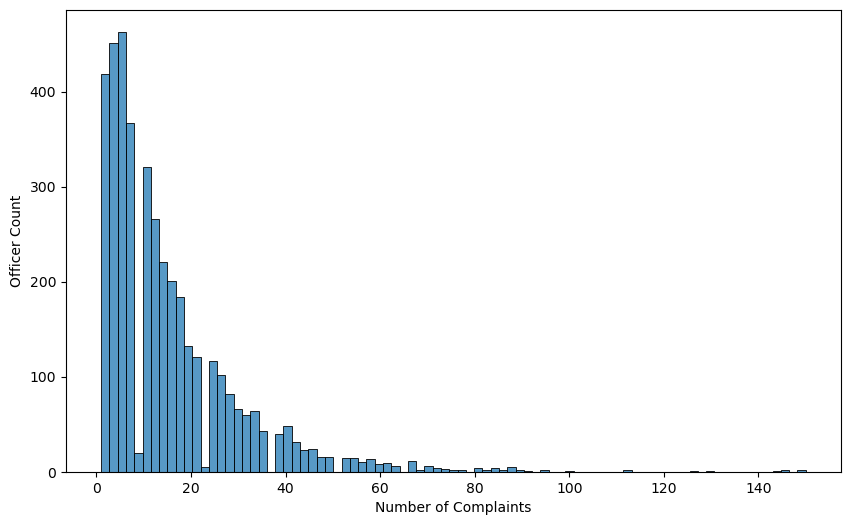

In [44]:
#histogram of number of complaints for a single officer
plt.figure(figsize=(10, 6))
ax = sns.histplot(x=data['unique_mos_id'].value_counts(), data=data)
ax.set_xlabel('Number of Complaints')
ax.set_ylabel('Officer Count')

Text(0, 0.5, 'Precinct(?) Count')

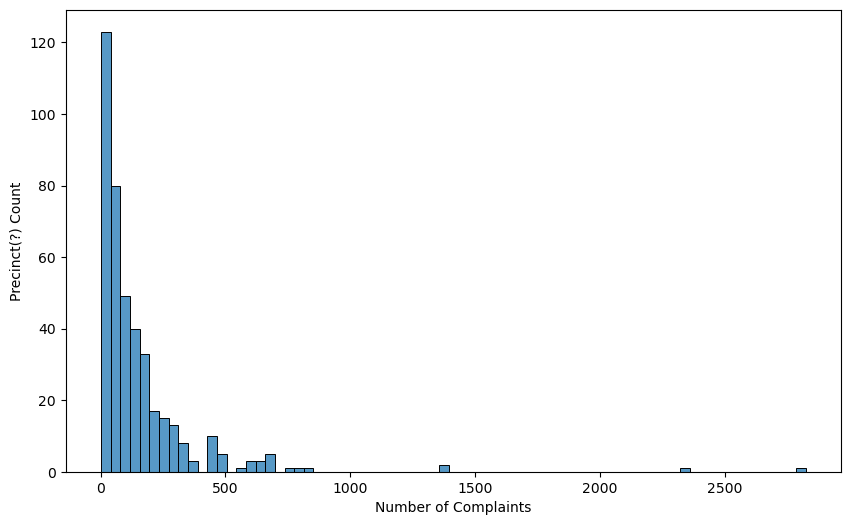

In [48]:
#histogram of number of complaints for a single precinct(?)
plt.figure(figsize=(10, 6))
ax = sns.histplot(x=data['command_now'].value_counts(), data=data)
ax.set_xlabel('Number of Complaints')
ax.set_ylabel('Precinct(?) Count')

In [58]:
command_now_over_1000 = data['command_now'].value_counts()[data['command_now'].value_counts() > 1000]
data_layout_table['Command_Abbrevs'][data_layout_table['Command_Abbrevs']['Abbreviation'].isin(command_now_over_1000.index)]


,Abbreviation,Command Name
1,WARRSEC,Warrant Section
12,NARCBBX,Narcotics Borough Bronx
18,INT CIS,Criminal Intelligence Section
126,DB CEIS,Organized Crime Investigation Division


<Axes: xlabel='fado_type', ylabel='count'>

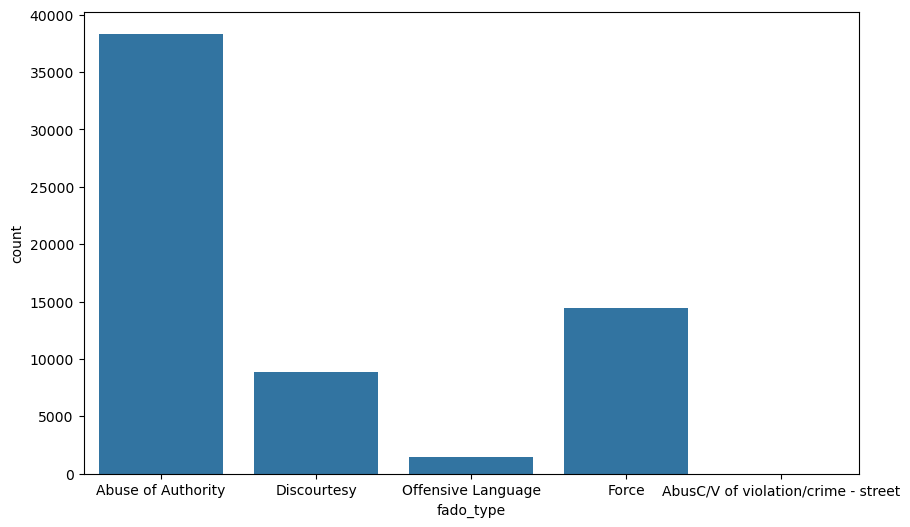

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fado_type', data=data)

In [69]:
data['allegation'].unique()

array(['Failure to provide RTKA card', 'Action', 'Race', 'Question',
       'Physical force', 'Refusal to process civilian complaint',
       'Sexual orientation', 'Word', 'Refusal to provide shield number',
       'Retaliatory summons', 'Refusal to provide name/shield number',
       'Search (of person)', 'Pepper spray', 'Handcuffs too tight',
       'Frisk', 'Vehicle stop', 'Vehicle search', 'Strip-searched',
       'Threat of arrest', 'Threat of force (verbal or physical)', 'Stop',
       'Refusal to obtain medical treatment',
       'Hit against inanimate object', 'Frisk and/or search', 'Other',
       'Question and/or stop', 'Premises entered and/or searched',
       'Gun Drawn', 'Nonlethal restraining device', 'Retaliatory arrest',
       'Seizure of property', 'Chokehold', 'Gender',
       'Nightstick as club (incl asp & baton)', 'Refusal to provide name',
       'Gun Pointed', 'Threat to notify ACS',
       'Other blunt instrument as a club', 'Property damaged',
       'Interfe

In [84]:
#some of the most common allegations
allegation_counts = data['allegation'].value_counts()
allegation_counts[allegation_counts > 1000]

allegation
Physical force                           9189
Word                                     7441
Stop                                     4342
Search (of person)                       3839
Frisk                                    3631
Premises entered and/or searched         2995
Refusal to provide name/shield number    2796
Vehicle search                           2655
Threat of arrest                         2589
Vehicle stop                             2060
Threat of force (verbal or physical)     1712
Question and/or stop                     1338
Other                                    1203
Gun Pointed                              1185
Strip-searched                           1063
Name: count, dtype: int64

In [85]:
#uncomment to see allegation countplot sorted in descending order
plt.figure(figsize=(10, 20))
allegation_order = data['allegation'].value_counts().index
#sns.countplot(y='allegation', data=data, order=allegation_order)

<Figure size 1000x2000 with 0 Axes>

<Axes: xlabel='year_received', ylabel='count'>

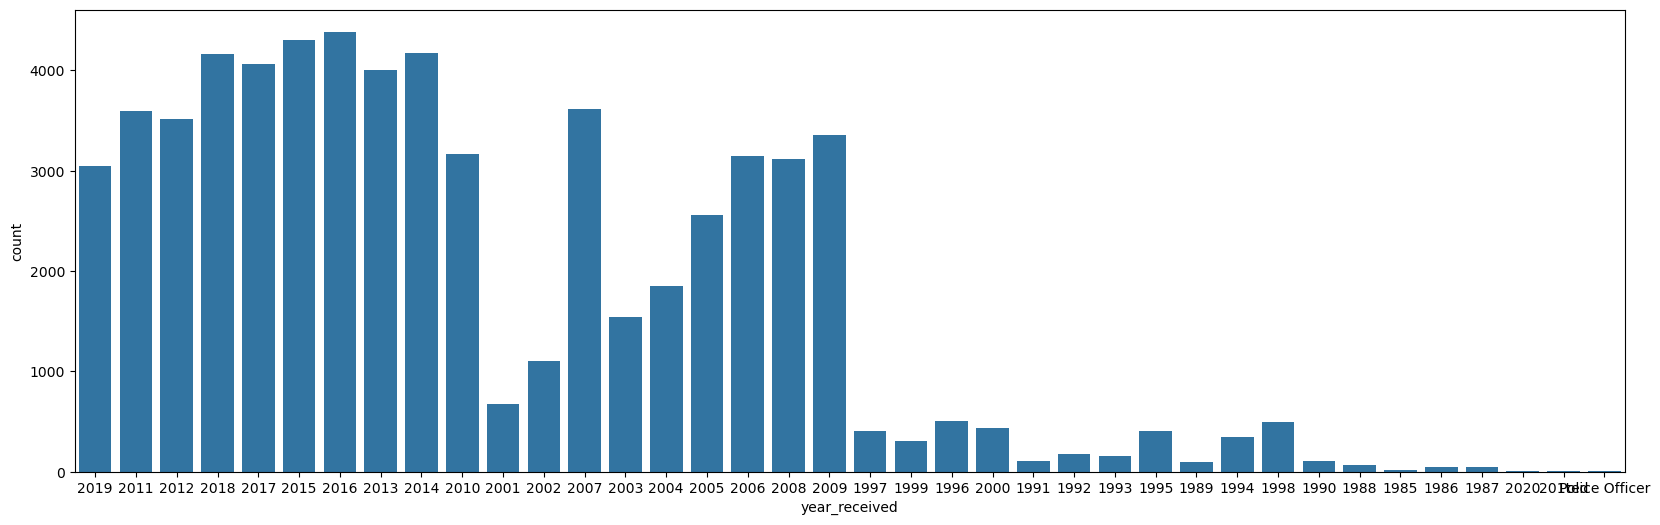

In [120]:
#must finish data cleaning first
plt.figure(figsize=(20, 6))
sns.countplot(x='year_received', data=data)